Define the weather station IDs we're interested in, that are near PSCO territory (which is discontinuous, unfortunately)

In [1]:
psco_station_ids = [
    "USW00023066"  # Grand Junction Walker Field
    "USC00053553",  # Greeley UNC
    "USC00053005",  # Ft Collins
    "USC00050848",  # Boulder
    "USC00055984",  # Northglenn
    "USC00058995",  # Wheat Ridge
    "USW00023061"  # Alamosa
]

Download daily data for each station

In [2]:
import requests

BASE_URL = "https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/all"

for station_id in psco_station_ids:
    dly_name = f"{station_id}.dly"
    station_url = f"{BASE_URL}/{dly_name}"
    print(f"Downloading {station_url}...")
    resp = requests.get(url=station_url, timeout=120)
    with open(f"ghcnd/station_data/{dly_name}", "w", encoding="utf-8") as f:
        f.write(resp.text)

Parse station observations data 

In [2]:
import os
from ghcnd.station_observations import read_from_dly_file

station_data_dir = "./ghcnd/station_data"
station_data = [read_from_dly_file(os.path.join(station_data_dir, f)) for f in os.listdir(station_data_dir)]

first_station = station_data[0]
first_station_obs = first_station.observations[0]
print(f"{first_station.station_id}: {first_station_obs.date} tmax={first_station_obs.tmax} tmin={first_station_obs.tmin}")


USC00050848: 2015-01-01 tmax=0 tmin=-144


Import station observations data in Pandas DataFrame

<AxesSubplot: xlabel='date'>

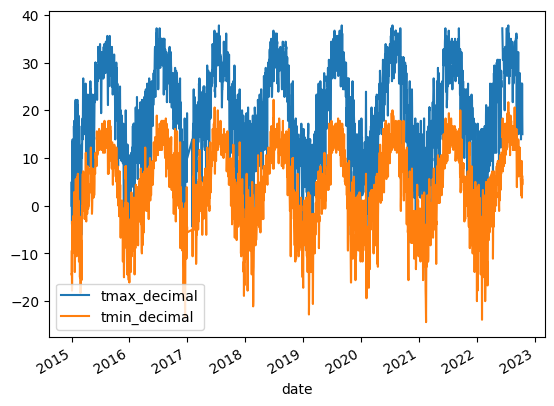

In [40]:
import pandas as pd
import matplotlib as plt
from datetime import date

obs = station_data[0].observations

df = pd.DataFrame(obs)
df["date"] = pd.to_datetime(df["date"])
df = df.assign(day_of_year=lambda x: x["date"].dt.day_of_year)

df.set_index("date", inplace=True)

df = df.assign(
    tmax_decimal=lambda x: x["tmax"] / 10.0,
    tmin_decimal=lambda x: x["tmin"] / 10.0)

df.plot(y=["tmax_decimal", "tmin_decimal"])
